In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_curve, auc, recall_score, make_scorer, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,eye_1_x_left,eye_1_x_right,eye_1_y_top,eye_1_y_bottom,eye_2_x_left,eye_2_x_right,eye_2_y_top,eye_2_y_bottom,face_left_width,face_right_width,face_top_width,face_bottom_width,label
0,4.997360,6.621079,3.961692,0.824285,6.714816,4.763476,5.291698,0.686313,1.744069,2.151651,2.904996,3.164798,yes
1,5.349181,6.603565,2.382987,0.421075,6.881760,4.589905,5.902860,0.768783,1.686102,2.166062,2.861971,3.330240,yes
2,4.980801,6.079814,4.061261,1.084569,6.878512,4.650054,6.481556,0.719440,1.665045,2.158678,2.868966,3.339942,yes
3,4.834072,6.163140,4.061575,0.968944,6.885792,4.623038,5.949605,0.736938,1.659212,2.140218,2.836565,3.305559,yes
4,5.091091,6.122474,2.660207,1.077114,6.893150,4.730788,6.201530,1.077176,1.685565,2.151486,2.865442,3.333663,yes


In [5]:
data['target'] = data['label'].apply(lambda x: 1.0 if x == ' yes' else 0.0)

In [6]:
data.head()

,eye_1_x_left,eye_1_x_right,eye_1_y_top,eye_1_y_bottom,eye_2_x_left,eye_2_x_right,eye_2_y_top,eye_2_y_bottom,face_left_width,face_right_width,face_top_width,face_bottom_width,label,target
0,4.997360,6.621079,3.961692,0.824285,6.714816,4.763476,5.291698,0.686313,1.744069,2.151651,2.904996,3.164798,yes,1.0
1,5.349181,6.603565,2.382987,0.421075,6.881760,4.589905,5.902860,0.768783,1.686102,2.166062,2.861971,3.330240,yes,1.0
2,4.980801,6.079814,4.061261,1.084569,6.878512,4.650054,6.481556,0.719440,1.665045,2.158678,2.868966,3.339942,yes,1.0
3,4.834072,6.163140,4.061575,0.968944,6.885792,4.623038,5.949605,0.736938,1.659212,2.140218,2.836565,3.305559,yes,1.0
4,5.091091,6.122474,2.660207,1.077114,6.893150,4.730788,6.201530,1.077176,1.685565,2.151486,2.865442,3.333663,yes,1.0


In [20]:
X = data.drop(['label', 'target'], axis=1).copy().to_numpy()
y = data['target'].copy().to_numpy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [23]:
param_grid_rf = {
    "max_depth": [2,3,5,7],
    "max_features": ['sqrt', 10, 50, 100, 150, 200, None],
    "n_estimators": [50, 100, 150]
}

optimal_params_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    verbose=2,
    n_jobs=10,
    cv=5
)

In [24]:
optimal_params_rf.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.6s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.8s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.8s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.8s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   1.7s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   1.7s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   1.8s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   1.8s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=150; total time=   1.7s
[CV] END ...max_depth=2, max_features=sqrt, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=10,
             param_grid={'max_depth': [2, 3, 5, 7],
                         'max_features': ['sqrt', 10, 50, 100, 150, 200, None],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=2)

In [25]:
y_pred = optimal_params_rf.predict(X_train)
f1_sc = f1_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
acc_score = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print(f"train -> f1-score: {f1_sc} | recall: {recall} | accuracy: {acc_score} | precision: {precision}")

train -> f1-score: 0.998377636340946 | recall: 1.0 | accuracy: 0.998375 | precision: 0.99676052828308


In [26]:
y_pred = optimal_params_rf.predict(X_test)
f1_sc = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"test -> f1-score: {f1_sc} | recall: {recall} | accuracy: {acc_score} | precision: {precision}")

test -> f1-score: 0.997 | recall: 0.997 | accuracy: 0.997 | precision: 0.997


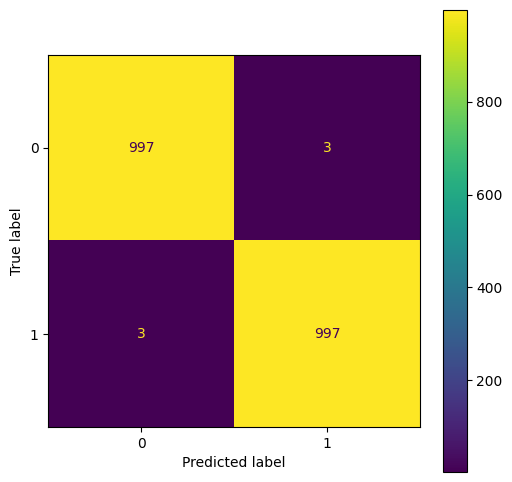

In [27]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(ax=ax)
plt.show()

In [28]:
import pickle

pickle.dump(optimal_params_rf.best_estimator_, open('model.pkl', 'wb'))

In [29]:
model = optimal_params_rf.best_estimator_

In [31]:
model.predict(X[0].reshape(1, -1))

array([1.])